In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [21]:
X_train, X_test, y_train, y_test = load('../../classification_data.joblib')

In [22]:
X_train.head()

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,0.428253,0.12500,0.424242,0.000000,0.0,0.644,0.998,0.952,0.998,0.028125,...,0.4,0.6,0.0,0.6,0.2,0.0,0.0,0.2,0.0,0.0
1,0.428310,0.25000,0.121212,0.428571,0.0,0.526,0.720,0.574,0.770,0.068125,...,0.4,0.6,0.0,0.4,0.0,0.0,0.0,0.6,0.0,0.0
2,0.382136,0.31250,0.303030,0.857143,0.0,0.724,0.600,0.756,0.000,0.122500,...,0.4,0.0,0.6,0.0,0.4,0.0,0.0,0.0,0.0,0.0
3,0.313732,0.12500,0.212121,0.714286,0.0,0.988,1.000,0.990,1.000,0.086875,...,0.6,0.4,0.6,0.8,0.4,0.0,0.0,0.4,0.0,0.0
4,0.542545,0.28125,0.303030,0.571429,0.0,1.000,0.824,0.946,0.970,0.155625,...,1.0,0.6,1.0,0.4,0.4,0.0,0.0,0.6,0.0,0.0


In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [24]:
def model_info(y_real, y_pred):
    print('Confusion matrix: \n', confusion_matrix(y_real, y_pred))
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred))
    print('Recall score: ', recall_score(y_real, y_pred))
    print('F1 score: ', f1_score(y_real, y_pred))

In [25]:
def build_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)

    print('Train data:\n')
    y_train_pred = model.predict(X_train)
    model_info(y_train, y_train_pred)
    
    print('\n--------------------------------------\n')

    print('Test data:\n')
    y_pred = model.predict(X_test)
    model_info(y_test, y_pred)

    return model

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier()

In [28]:
knn = build_model(knn, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[42912  5120]
 [ 5445 44433]]
Accuracy score:  0.8920947809212542
Precision score:  0.8966762859968115
Recall score:  0.8908336340671238
F1 score:  0.8937454113908138

--------------------------------------

Test data:

Confusion matrix: 
 [[ 9816  2148]
 [ 2288 10226]]
Accuracy score:  0.8187760437944277
Precision score:  0.8264102149668661
Recall score:  0.8171647754514944
F1 score:  0.8217614914818387


In [29]:
import math
math.ceil(math.sqrt(X_train.shape[0]))

313

In [30]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_neighbors': [25, 50, 100, 200, 300],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

In [31]:
estimator = GridSearchCV(KNeighborsClassifier(), param_grid=params, cv=3)

In [32]:
estimator.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [25, 50, 100, 200, 300], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [33]:
estimator.best_params_

{'n_neighbors': 25, 'p': 1, 'weights': 'distance'}

In [34]:
estimator.best_score_

0.816913512703091

In [35]:
estimator = build_model(estimator, X_train, X_test, y_train, y_test)

Train data:

Confusion matrix: 
 [[47932   100]
 [  197 49681]]
Accuracy score:  0.9969666019814115
Precision score:  0.9979912014624054
Recall score:  0.9960503628854405
F1 score:  0.9970198376463741

--------------------------------------

Test data:

Confusion matrix: 
 [[10156  1808]
 [ 2104 10410]]
Accuracy score:  0.8401830214886837
Precision score:  0.8520216074643968
Recall score:  0.8318683074956049
F1 score:  0.8418243571081999


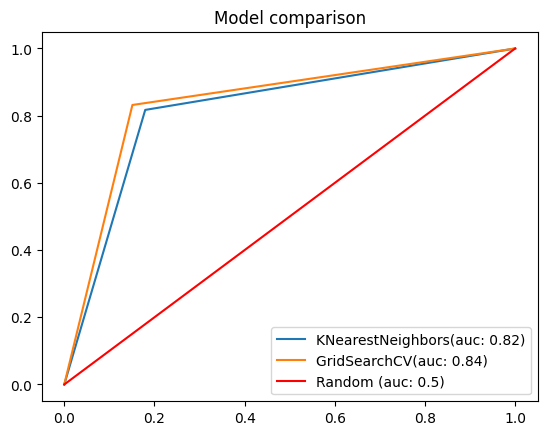

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score
models = [knn, estimator.best_estimator_]
model_names = ['KNearestNeighbors', 'GridSearchCV']
for model, model_name in zip(models, model_names):
    y_pred = model.predict(X_test)
    fpr,tpr, _ = roc_curve(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    lab = model_name + "(auc: " + str(round(auc, 2)) + ")"
    plt.plot(fpr, tpr, label=lab)

plt.plot([0, 1], [0, 1], label='Random (auc: 0.5)', color='red')
plt.title("Model comparison")
plt.legend()
plt.show()

In [37]:
from joblib import dump

In [38]:
dump(models, 'knn.joblib')

['knn.joblib']